### Student Information
Name: 郭晉廷 Robin

Student ID: 107065526

GitHub ID: s103321048

Kaggle name: https://www.kaggle.com/kuochinting

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

# First:

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [2]:
import pandas as pd
### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

X = train_df
count_vect = CountVectorizer()
df_tf = count_vect.fit_transform(X.text)

term_frequencies = []
for j in range(0,df_tf.shape[1]):
    term_frequencies.append(sum(df_tf[:,j].toarray()))
    
term_frequencies = np.asarray(df_tf.sum(axis=0))[0]

In [4]:
show = pd.DataFrame({ 'term_frequencies': term_frequencies,
                      'feature_names': count_vect.get_feature_names()
                    })
show.sort_values(by='term_frequencies', ascending= False, inplace=True)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(30, 10))
g = sns.barplot(x=show['feature_names'][:30], 
            y=show['term_frequencies'][:30])
g.set_xticklabels(show['feature_names'][:30], rotation = 90);

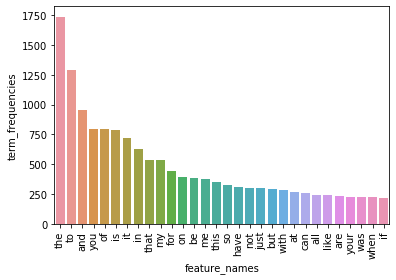

In [9]:
g = sns.barplot(x=show['feature_names'][:30], 
            y=show['term_frequencies'][:30])
g.set_xticklabels(show['feature_names'][:30], rotation = 90);

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train_df['text'])
vectorizer = TfidfVectorizer()
X_idf = vectorizer.fit_transform(corpus) # Learn vocabulary and idf, return term-document matrix.
print(vectorizer.get_feature_names()[100:110]) # print term-document matrix

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']


---
![ex3](pics/ex3.png)
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [15]:
# Answer here
# The y-axis represent how the model predict
# The x-axis represent the real label for the emotion of the data
# For example the "black 70" means the emotion is fear, and the model really predict it as fear

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [19]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [20]:
# Answer here
from sklearn.tree import DecisionTreeClassifier
# training/testing data prepare
X_train = BOW_500.transform(train_df['text'])
Y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
Y_test = test_df['emotion']

# train with naive_bayes
from sklearn.naive_bayes import BernoulliNB

bnb_tf = BernoulliNB(binarize=0.0)
## training!
bnb_tf.fit(X_train, Y_train)

## predict!
y_train_pred = bnb_tf.predict(X_train)
y_test_pred = bnb_tf.predict(X_test)
y_test_pred[:10]

array(['anger', 'anger', 'anger', 'fear', 'fear', 'sadness', 'fear',
       'fear', 'fear', 'sadness'], dtype='<U7')

In [22]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=Y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=Y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.8
testing accuracy: 0.71


In [23]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.68      0.66        84
        fear       0.74      0.80      0.77       110
         joy       0.79      0.67      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



In [25]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=Y_test, y_pred=y_test_pred) 
print(cm)

[[57 12  5 10]
 [13 88  3  6]
 [ 9  8 53  9]
 [10 11  6 47]]


In [26]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

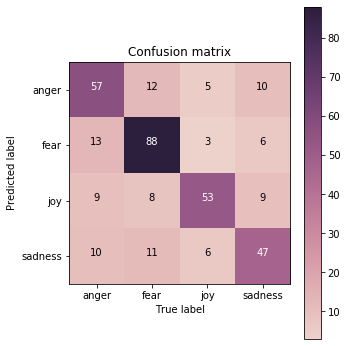

In [27]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [28]:
### Answer here

## Decision Trees
#training accuracy: 0.99
#testing accuracy: 0.64

##Naive_Bayes
#training accuracy: 0.8
#testing accuracy: 0.71

# Decision tree have better performance on training data is becasue Descision Tree is overfitting
# Naive Bayes have a better testing accuracy because it is base on probability which make it more robust and less affect by the training data

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [30]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.376695,1.318748,0.463977,1.260115
1,1,0.639358,0.980372,0.642651,0.957817
2,2,0.789372,0.585165,0.694524,0.812088
3,3,0.837531,0.423604,0.685879,0.826111
4,4,0.872682,0.340456,0.708934,0.777009
5,5,0.898699,0.279962,0.714697,0.834833
6,6,0.922779,0.231137,0.682997,0.914465
7,7,0.938278,0.196167,0.700288,0.960180
8,8,0.945751,0.167376,0.697406,0.990643
9,9,0.955992,0.145909,0.682997,1.051301


[]

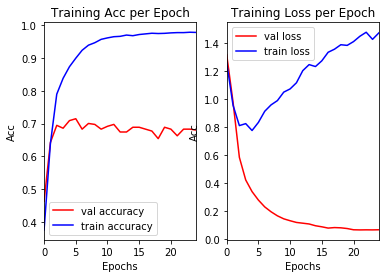

In [31]:
# Answer here
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
training_log['val_accuracy'].plot(label='val accuracy', color='red')
training_log['accuracy'].plot(label='train accuracy', color='blue')

plt.title("Training Acc per Epoch")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.plot()

plt.subplot(1,2,2)
training_log['loss'].plot(label='val loss', color='red')
training_log['val_loss'].plot(label='train loss', color='blue')

plt.title("Training Loss per Epoch")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.plot()

In [ ]:
# After the third epochs is overfitting because the loss is starting to rise.
# Before third epochs is underfitting becuase the result is still improving,
#   which not at local minimun yet.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [32]:
# Answer here
# Same as how we utilize the "word" vectors. We can also utilize the sentence vector.
# A simlple example is "bag of word". Each sentence is a combination of words.

# The most well known technic now is call Bert.
# Not just it contain the information of sequence. It can also solve several task such as: 
# sentiment analysis, document classification, slot filling, natural language inference, question answering
# all above task train base on sentence, or enhance document ( combination of sentence).

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [33]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [34]:
# Answer here

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

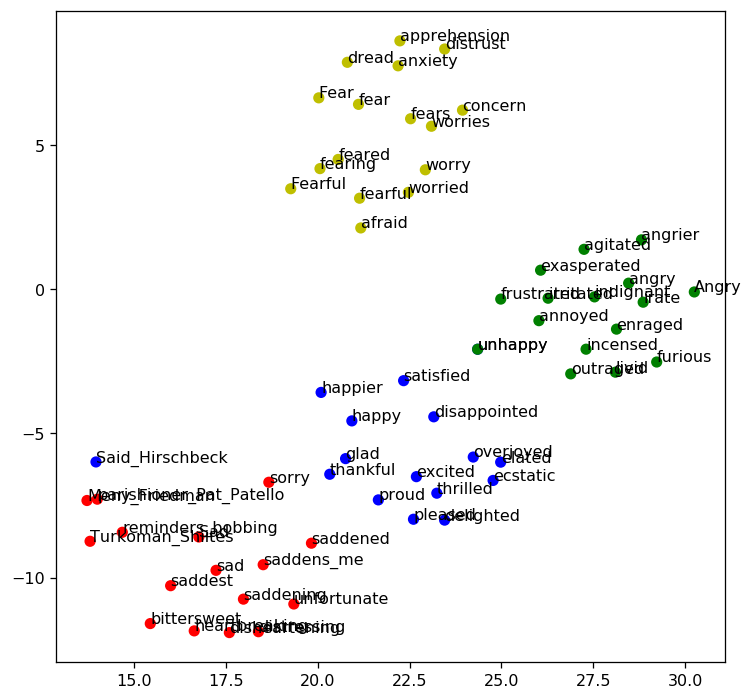

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Second 

In [ ]:
# all the code demo below are set to very same size
# so it can show very fast

<img src="pics/score.png"/> 

## First Try

### preprocessing steps

In [1]:
import pandas as pd
train = pd.read_pickle("KaggleData/df_train.pkl")
test = pd.read_pickle('KaggleData/df_test.pkl')

In [2]:
train['emotion'].value_counts()

joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: emotion, dtype: int64

In [3]:
# equal sample emotion:
# since majority of the training data is joy
# I think it'll be better for model to modulify by sample equal training data on each emotion
emotion_list = train['emotion'].unique()

sample_amount = 100
half_sample_amount = int(sample_amount/2)
sample_train_df = pd.DataFrame()
sample_test_df = pd.DataFrame()

print(emotion_list)
for e in emotion_list:
    collect = train[ train['emotion'] == e].sample(sample_amount)
    sample_train_df = pd.concat([sample_train_df, collect[0:half_sample_amount]])
    sample_test_df = pd.concat([sample_test_df, collect[half_sample_amount:]])
    
print('sample_train_df: ',sample_train_df.shape)
print('sample_test_df: ',sample_test_df.shape)

['anticipation' 'sadness' 'trust' 'fear' 'joy' 'disgust' 'surprise'
 'anger']
sample_train_df:  (400, 6)
sample_test_df:  (400, 6)


In [4]:
# then shuffle the data to make it more random
from sklearn.utils import shuffle
sample_train_df = shuffle(sample_train_df)
sample_test_df = shuffle(sample_test_df)

sample_train_df['emotion'].head()  # make sure it is shuffled

1129014            fear
320206          sadness
323829            trust
1636085    anticipation
1782571             joy
Name: emotion, dtype: object

### the feature engineering

In [5]:
# I used bag of word to find out the features

import nltk
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_1000 = CountVectorizer(max_features=100, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_1000.fit(sample_train_df['text'])

sample_train_data_BOW_features_1000 = BOW_1000.transform(sample_train_df['text'])

## check dimension
sample_train_data_BOW_features_1000.shape

(400, 100)

In [6]:
# just fitting the training data

import keras
# standardize name (X, y) 
X_train = BOW_1000.transform(sample_train_df['text'])
y_train = sample_train_df['emotion']

X_test = BOW_1000.transform(sample_test_df['text'])
y_test = sample_test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

X_train.shape:  (400, 100)
y_train.shape:  (400,)
X_test.shape:  (400, 100)
y_test.shape:  (400,)


In [7]:
## deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 1129014            fear
320206          sadness
323829            trust
1636085    anticipation
Name: emotion, dtype: object

y_train.shape:  (400,)
y_test.shape:  (400,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]

y_train.shape:  (400, 8)
y_test.shape:  (400, 8)


In [8]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  100
output_shape:  8


### an explanation of your model

In [9]:
# my model is a ten layer NN
# input will be the size of BagOfWord
# output will be the 8 emotion

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 1000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=512)(X)  # 512
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=512)(H1)  # 256
H2 = ReLU()(H1_W2)

# 3nd hidden layer
H2_W3 = Dense(units=256)(H2)  # 128
H3 = ReLU()(H2_W3)

# 4nd hidden layer
H3_W4 = Dense(units=256)(H3)  # 64
H4 = ReLU()(H3_W4)

# 5nd hidden layer
H4_W5 = Dense(units=128)(H4)  # 32
H5 = ReLU()(H4_W5)
#-----
# 6st hidden layer
H5_W6 = Dense(units=128)(H5)  # 512
H6 = ReLU()(H5_W6)

# 7nd hidden layer
H6_W7 = Dense(units=64)(H6)  # 256
H7 = ReLU()(H6_W7)

# 8nd hidden layer
H7_W8 = Dense(units=64)(H7)  # 128
H8 = ReLU()(H7_W8)

# 9nd hidden layer
H8_W9 = Dense(units=32)(H8)  # 64
H9 = ReLU()(H8_W9)

# 10nd hidden layer
H9_W10 = Dense(units=16)(H9)  # 32
H10 = ReLU()(H9_W10)

# output layer
H10_W11 = Dense(units=output_shape)(H10)  # 8
H11 = Softmax()(H10_W11)

model_output = H11

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51712     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_2 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_____________________________________________________

result: 
sample each emotion equal, 3 layer , 25-epoch =  0.26454
sample each emotion equal, 3 layer ,  1-epoch =  0.29654
randomSample             , 3 layer , 25-epoch =  0.33609
randomSample             , 3 layer ,  1-epoch =  0.41453 
randomSample             , 10layer , 10-epoch =  0.35204
randomSample             , 10layer ,  3-epoch =  0.39832
All Data                 , 10layer ,  3-epoch =  0.41130
All Data                 , 10layer ,  1-epoch =  0.40253
All Data                 ,  3layer ,  1-epoch =  0.43155 *

---

## Second Try

### preprocessing steps

In [10]:
# try to figure out the relationship between tag and emotion

# create tag_dict    to find out all tags
def create_tag_dict(sample_train_df):
    tag_dict = dict({'@': 0}) # this is a dummy, incase there are no "tag"
    for tag in sample_train_df['hashtags']:
        end = len(tag)
        if (end == 0):
            continue
        elif (end == 1):
            if tag[0] not in tag_dict.keys():
                tag_dict[tag[0]] = 1
            else:
                tag_dict[tag[0]] = tag_dict[tag[0]] + 1
        else:
            for t in tag:
                if t not in tag_dict.keys():
                    tag_dict[t] = 1
                else:
                    tag_dict[t] = tag_dict[t] + 1
    return tag_dict

tag_dict = create_tag_dict(sample_train_df)
test_tag_dict = create_tag_dict(test)


In [11]:
# to see the how many tag in test data are related
count_in = 0
count_not = 0
for tag in test_tag_dict:
    if (tag in tag_dict):
        count_in += 1
    else:
        count_not += 1
print("same tags:", count_in, "   , different:", count_not)

same tags: 252    , different: 109641


In [12]:
def dataPreprocess(sample_train_df):
    #X_train = sample_train_df[['hashtags','text','score', 'date', 'emotion']]
    X_train = sample_train_df[['hashtags','score']]

    for tmp in ['anticipation', 'sadness', 'trust', 'fear', 'joy', 'disgust', 'surprise', 'anger']:
        X_train[str('tagEmt_' + tmp)] = 0
    baseline = 5
    #X_train['hashtags'] = X_train['hashtags'].apply(lambda x: convert_tag_to_most_common( x, baseline )) ### only save most common tag
    X_train['score'] = sample_train_df['score'].apply(lambda x: int(x/100))     ### scaling the score
    #print(X_train['score'].value_counts())
    return X_train

X_train = dataPreprocess(sample_train_df)
test_data = dataPreprocess(test)
test_data

/home/robin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hashtags,score,tagEmt_anticipation,tagEmt_sadness,tagEmt_trust,tagEmt_fear,tagEmt_joy,tagEmt_disgust,tagEmt_surprise,tagEmt_anger
933767,"[christmascookie, PumpkinSpice, Coconut]",5,0,0,0,0,0,0,0,0
547834,[],6,0,0,0,0,0,0,0,0
547837,[],6,0,0,0,0,0,0,0,0
1439989,[],7,0,0,0,0,0,0,0,0
547845,[],9,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1801198,"[PrayingforyoU, God]",7,0,0,0,0,0,0,0,0
1855749,[],2,0,0,0,0,0,0,0,0
1855742,[],6,0,0,0,0,0,0,0,0
1701933,[],6,0,0,0,0,0,0,0,0


### the feature engineering

In [13]:
# give a better look at the relation between emotion

tag_df = pd.DataFrame.from_dict(tag_dict, orient='index', columns=['num'])
for tmp in ['anticipation', 'sadness', 'trust', 'fear', 'joy', 'disgust', 'surprise', 'anger']:
    tag_df[tmp] = 0

# find the relation between emotion & tags
for tag, emotion in zip(sample_train_df['hashtags'], sample_train_df['emotion']):
    end = len(tag)
    if (end == 0):
        ;
    elif (end == 1):
        tag_df.loc[tag[0]][emotion] = tag_df.loc[tag[0]][emotion] + 1
    else:
        for t in tag:
            tag_df.loc[t][emotion] = tag_df.loc[t][emotion] + 1
            
#Result for [tag & emotion]
tag_df[ tag_df['num'] > 0 ].sort_values(by=['num'], ascending=False)

,num,anticipation,sadness,trust,fear,joy,disgust,surprise,anger
God,4,4,0,0,0,0,0,0,0
Trump,3,0,0,0,0,0,2,0,1
adulting,2,1,0,0,0,1,0,0,0
MAGA,2,1,0,0,0,0,1,0,0
frustrated,2,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
womenhaters,1,0,0,0,0,0,1,0,0
nazis,1,0,0,0,0,0,1,0,0
Modi,1,0,0,0,0,0,1,0,0
orgy,1,0,0,0,0,0,0,0,1


In [14]:
# seperate tag into columns, how each tag relate to emotion
# create 8 columns each represent one emotion
# add up the number of the tag show in emotion and turn into %

from IPython.display import display, clear_output
def make_tag_emotion(df):  # input dataframe, output dataframe, only change the value of tagEmt
    
    def tag2emotion(tags): # convert to list
        num, anti, sad, trust, fear, joy, dis, surp, anger = 0,0,0,0,0,0,0,0,0
        num_tag = 0
        if (tags == []):
            return [anti, sad, trust, fear, joy, dis, surp, anger]
        else:
            for tag in tags:
                num_tag = num_tag + 1
                if (tag not in tag_dict.keys()):
                    ;
                else:
                    num   = tag_df.loc[tag]['num']
                    anti  = anti  + tag_df.loc[tag]['anticipation'] / num
                    sad   = sad   + tag_df.loc[tag]['sadness'] / num
                    trust = trust + tag_df.loc[tag]['trust'] / num
                    fear  = fear  + tag_df.loc[tag]['fear'] / num
                    joy   = joy   + tag_df.loc[tag]['joy'] / num 
                    dis   = dis   + tag_df.loc[tag]['disgust'] / num 
                    surp  = surp  + tag_df.loc[tag]['surprise'] / num
                    anger = anger + tag_df.loc[tag]['anger'] / num 

        anti  = round( anti /num_tag, 3)
        sad   = round( sad  /num_tag, 3)
        trust = round( trust/num_tag, 3)
        fear  = round( fear /num_tag, 3)
        joy   = round( joy  /num_tag, 3)
        dis   = round( dis  /num_tag, 3)
        surp  = round( surp /num_tag, 3)
        anger = round( anger/num_tag, 3)
        return [anti, sad, trust, fear, joy, dis, surp, anger]

    
    df2 = df
    end = df.shape[0]
    now = 0
    for row in df2.index:
        now += 1
        if (now % 1000 == 0):
            clear_output(wait=False)
            display('loading... '+ str(now) + ' / ' + str(end) )
            
        tagEmt = tag2emotion(df2['hashtags'][row])
#        print(tagEmt)
        change_target = ['tagEmt_anticipation','tagEmt_sadness','tagEmt_trust','tagEmt_fear','tagEmt_joy','tagEmt_disgust','tagEmt_surprise','tagEmt_anger']
        count = 0
        for tmp in change_target:
            df2.loc[row, tmp] = tagEmt[count]
            count = count + 1
    return df2

X_TRAIN = make_tag_emotion(X_train)
X_train = X_TRAIN
X_train = X_train.drop(columns=['hashtags'])
X_train


,score,tagEmt_anticipation,tagEmt_sadness,tagEmt_trust,tagEmt_fear,tagEmt_joy,tagEmt_disgust,tagEmt_surprise,tagEmt_anger
1129014,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320206,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323829,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1636085,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1782571,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
104505,1,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5
656337,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1601291,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
396089,10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# emotion label-encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
emotion = labelencoder.fit_transform(sample_train_df['emotion'])
emotion=pd.DataFrame(emotion, columns=['emotion'])

In [16]:
from sklearn.model_selection import train_test_split
x=X_train
y=emotion

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20170816)

### an explanation of your model

In [17]:
# the model is just LogisticRegression from sklearn

from sklearn import datasets, linear_model

# from sklearn import linear_model
lgR = linear_model.LogisticRegression()

# 訓練模型
lgR.fit(X_train, y_train)

# 預測測試集
y_pred = lgR.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
# not yet check the score.... but able to predict
from sklearn.metrics import  accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.49166666666666664


result:  0.10639
((not so impressing...

## Third try

### the feature engineering

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(sample_train_df.text)
vectorizer = TfidfVectorizer(max_features = 5000)
X_tfidf = vectorizer.fit_transform(corpus) # Learn vocabulary and idf, return term-document matrix.
print(vectorizer.get_feature_names()) # print term-document matrix

['00', '01', '04', '05', '08', '10', '11', '12', '12753', '13', '14', '15', '15am', '16', '1722', '18', '180', '1822', '1833', '18434', '19', '1st', '20', '2002', '2017', '22nd', '23am', '24', '24hr', '26', '2daynotice', '2line', '30', '30am', '33', '37', '38', '3d', '3rdmb', '3swish_georges', '40', '40404', '42', '43', '45pm', '47', '475', '53', '68', '6sp', '70s80s90s00s', '74', '830', '941', '9xjalwa', '_raudahlasiol_', 'aajtak', 'abandoning', 'abdominal', 'abhiya', 'ability', 'about', 'above', 'absolutely', 'abt', 'abzsalmeron', 'academic', 'accident', 'accidentally', 'accomplish', 'account', 'accountable', 'acct', 'accurately', 'ace', 'aclu', 'acrobats', 'action', 'actors', 'actual', 'actually', 'addicted', 'adds', 'admit', 'adulting', 'adults', 'advance', 'advantage', 'af', 'after', 'again', 'against', 'agencies', 'agentsofshield', 'ages', 'agnostic', 'agree', 'agreed', 'ah', 'air', 'ajith_tfc', 'aldautomotiveuk', 'alien', 'alive', 'all', 'allah', 'allergies', 'allthesequeries', 

In [20]:
X_tfidf.shape

(400, 2147)

### an explanation of your model

In [ ]:
# using the same LogisticRegression Model 
# acc = 0.32

## Fourth try

In [ ]:
# combine all above
# since there are too many parameter, the acc decrease even more...